Erhan Namlı<br>
Ege University - IEEE Student<br>
Mastering Applied Data Science with Deep Learning, January 2021 cohort<br>

<h1 align="center">NLP Project Final Project</h1>

# Introduction #
**Problem Statement**: Classifying Amazon reviews based on customer ratings using NLP

<h4 align="center">Impact</h4>

Reviews provide objective feedback to a product and are therefore inherently useful for consumers. These ratings are often summarized by a numerical rating, or the number of stars. Of course there is more value in the actual text itself than the quantified stars. And at times, the given rating does not truly convey the experience of the product – the heart of the feedback is actually in the text itself. The goal therefore is to build a classifier that would understand the essence of a piece of review and assign it the most appropriate rating based on the meaning of the text.

<h4 align="center">Background</h4>

Though product ratings on Amazon are aggregated from all the reviews by every customer, each individual rating is actually only an integer that ranges from one star to five stars. This reduces our predictions to discrete classes totaling five possibilities. Therefore what we'll have is a supervised, multi-class classifier with the actual review text as the core predictor.

This study is an exploration of Natural Language Processing (NLP). The goal of predicting the star rating given a piece of text will take on different NLP topics including word embedding, topic modeling, and dimension reduction. From there, we'll arrive at a final dataframe and we'll be employing different machine learning techniques in order to come up with the best approach (i.e. most accurate estimator) for our classifier.

<h4 align="center" id="Datasets">Datasets</h4>

The [Amazon dataset](http://jmcauley.ucsd.edu/data/amazon/index.html) contains the customer reviews for all listed *Electronics* products spanning from May 1996 up to July 2014. There are a total of 1,689,188 reviews by a total of 192,403 customers on 63,001 unique products. The data dictionary is as follows:

*  **asin** - Unique ID of the product being reviewed, *string*
*  **helpful** - A list with two elements: the number of users that voted *helpful*, and the total number of users that voted on the review (including the *not helpful* votes), *list*
*  **overall** - The reviewer's rating of the product, *int64*
*  **reviewText** - The review text itself, *string*
*  **reviewerID** - Unique ID of the reviewer, *string*
*  **reviewerName** - Specified name of the reviewer, *string*
*  **summary** - Headline summary of the review, *string*
*  **unixReviewTime** - Unix Time of when the review was posted, *string*

**In this project our objectives are firstly taking data from given link and doing some clearing proccess in that data, and we have to split that data because its so big for NLP Project steps**

**I saved my data every chapter what I did because whenever I finished one part of proccess shortly after my kernel would deceased.**

# Data Setup

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [ ]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))
df.to_csv("amazon.csv")

# EDA

In [ ]:
df = pd.read_csv('amazon.csv')

In [ ]:
df =df.sample(frac=0.70)

In [ ]:
df.info()

In [ ]:
df.sample(4)

# Feature Engineering

Creating Date Time column and clearing reviewText

In [ ]:
from datetime import datetime

In [ ]:
condition = lambda row: datetime.fromtimestamp(row).strftime("%m-%d-%Y")
df["unixReviewTime"] = df["unixReviewTime"].apply(condition)

In [ ]:
df.drop(labels="reviewTime", axis=1, inplace=True)

In [ ]:
df

### Clearing html tags from text column

In [ ]:
pattern = r"\&\#[0-9]+\;"

df["preprocessed"] = df["reviewText"].str.replace(pat=pattern, repl="", regex=True)

#### Dropping useless columns

In [ ]:
df.drop(["reviewerID","asin","reviewerName","helpful","summary","unixReviewTime"],axis=1,inplace=True)

#### Visualization

In [ ]:
df.overall.value_counts().plot.bar()

## NLP Text Preprocessing

### Clearing

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df["reviewText"]=df["reviewText"].str.lower() 
df["reviewText"]=df["reviewText"].str.replace("[^\w\s]","") 
df["reviewText"]=df["reviewText"].str.replace("\d+","") 
df["reviewText"]=df["reviewText"].str.replace("\n"," ").replace("\r","") 

### Classification our overall score by sentiment

In [ ]:
df.loc[df["overall"]==3,"sentimentOverall"]="neutral"
df.loc[df["overall"]<3,"sentimentOverall"]="negative"
df.loc[df["overall"]>3,"sentimentOverall"]="positive"

In [ ]:
df

In [ ]:
df["sentimentOverall"].value_counts().plot.bar()

In [ ]:
df['reviewText'].isnull().sum()

In [ ]:
df=df[df.reviewText.notna()]

In [ ]:
df.to_csv('pause0.csv')

In [ ]:
df = pd.read_csv('pause0.csv')

## Tokenization

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(str(i)) for i in df['reviewText'].values]

In [ ]:
df.to_csv('pause1.1.csv')

In [ ]:
df = pd.read_csv('pause1.1.csv')

In [ ]:
df

In [ ]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

## Polarity & Subjectivity

In [ ]:
from textblob import TextBlob
df[["polarity","subjectivity"]]=df["reviewText"].apply(lambda t:pd.Series(TextBlob(t).sentiment))

# Save and Load

In [ ]:
df.to_csv('pause4.csv')

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('pause4.csv')

In [16]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
df.loc[df['subjectivity']>0.5,'sentimentPolarity']="positive" #positive
df.loc[df['subjectivity']==0.5,'sentimentPolarity']="neutral" #neutral
df.loc[df['subjectivity']<0.5,'sentimentPolarity']="negative" #negative
df.head()

,reviewText,overall,preprocessed,sentimentOverall,tokenized,polarity,subjectivity,sentimentPolarity
0,if you like bass then you will like these head...,4,If you like bass then you will like these head...,positive,"['if', 'you', 'like', 'bass', 'then', 'you', '...",0.152083,0.633333,positive
1,after a few recharges this battery seems to be...,5,After a few recharges this battery seems to be...,positive,"['after', 'a', 'few', 'recharges', 'this', 'ba...",-0.043750,0.412500,negative
2,really sharp colors i love asus products and t...,5,really sharp colors. I love asus products and ...,positive,"['really', 'sharp', 'colors', 'i', 'love', 'as...",0.125000,0.650000,positive
3,games can be played at maximum resolution wind...,5,games can be played at maximum resolution wind...,positive,"['games', 'can', 'be', 'played', 'at', 'maximu...",0.910000,0.780000,positive
4,perfect size for travel and outstanding sound ...,5,Perfect size for travel and outstanding sound ...,positive,"['perfect', 'size', 'for', 'travel', 'and', 'o...",0.417857,0.628571,positive


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

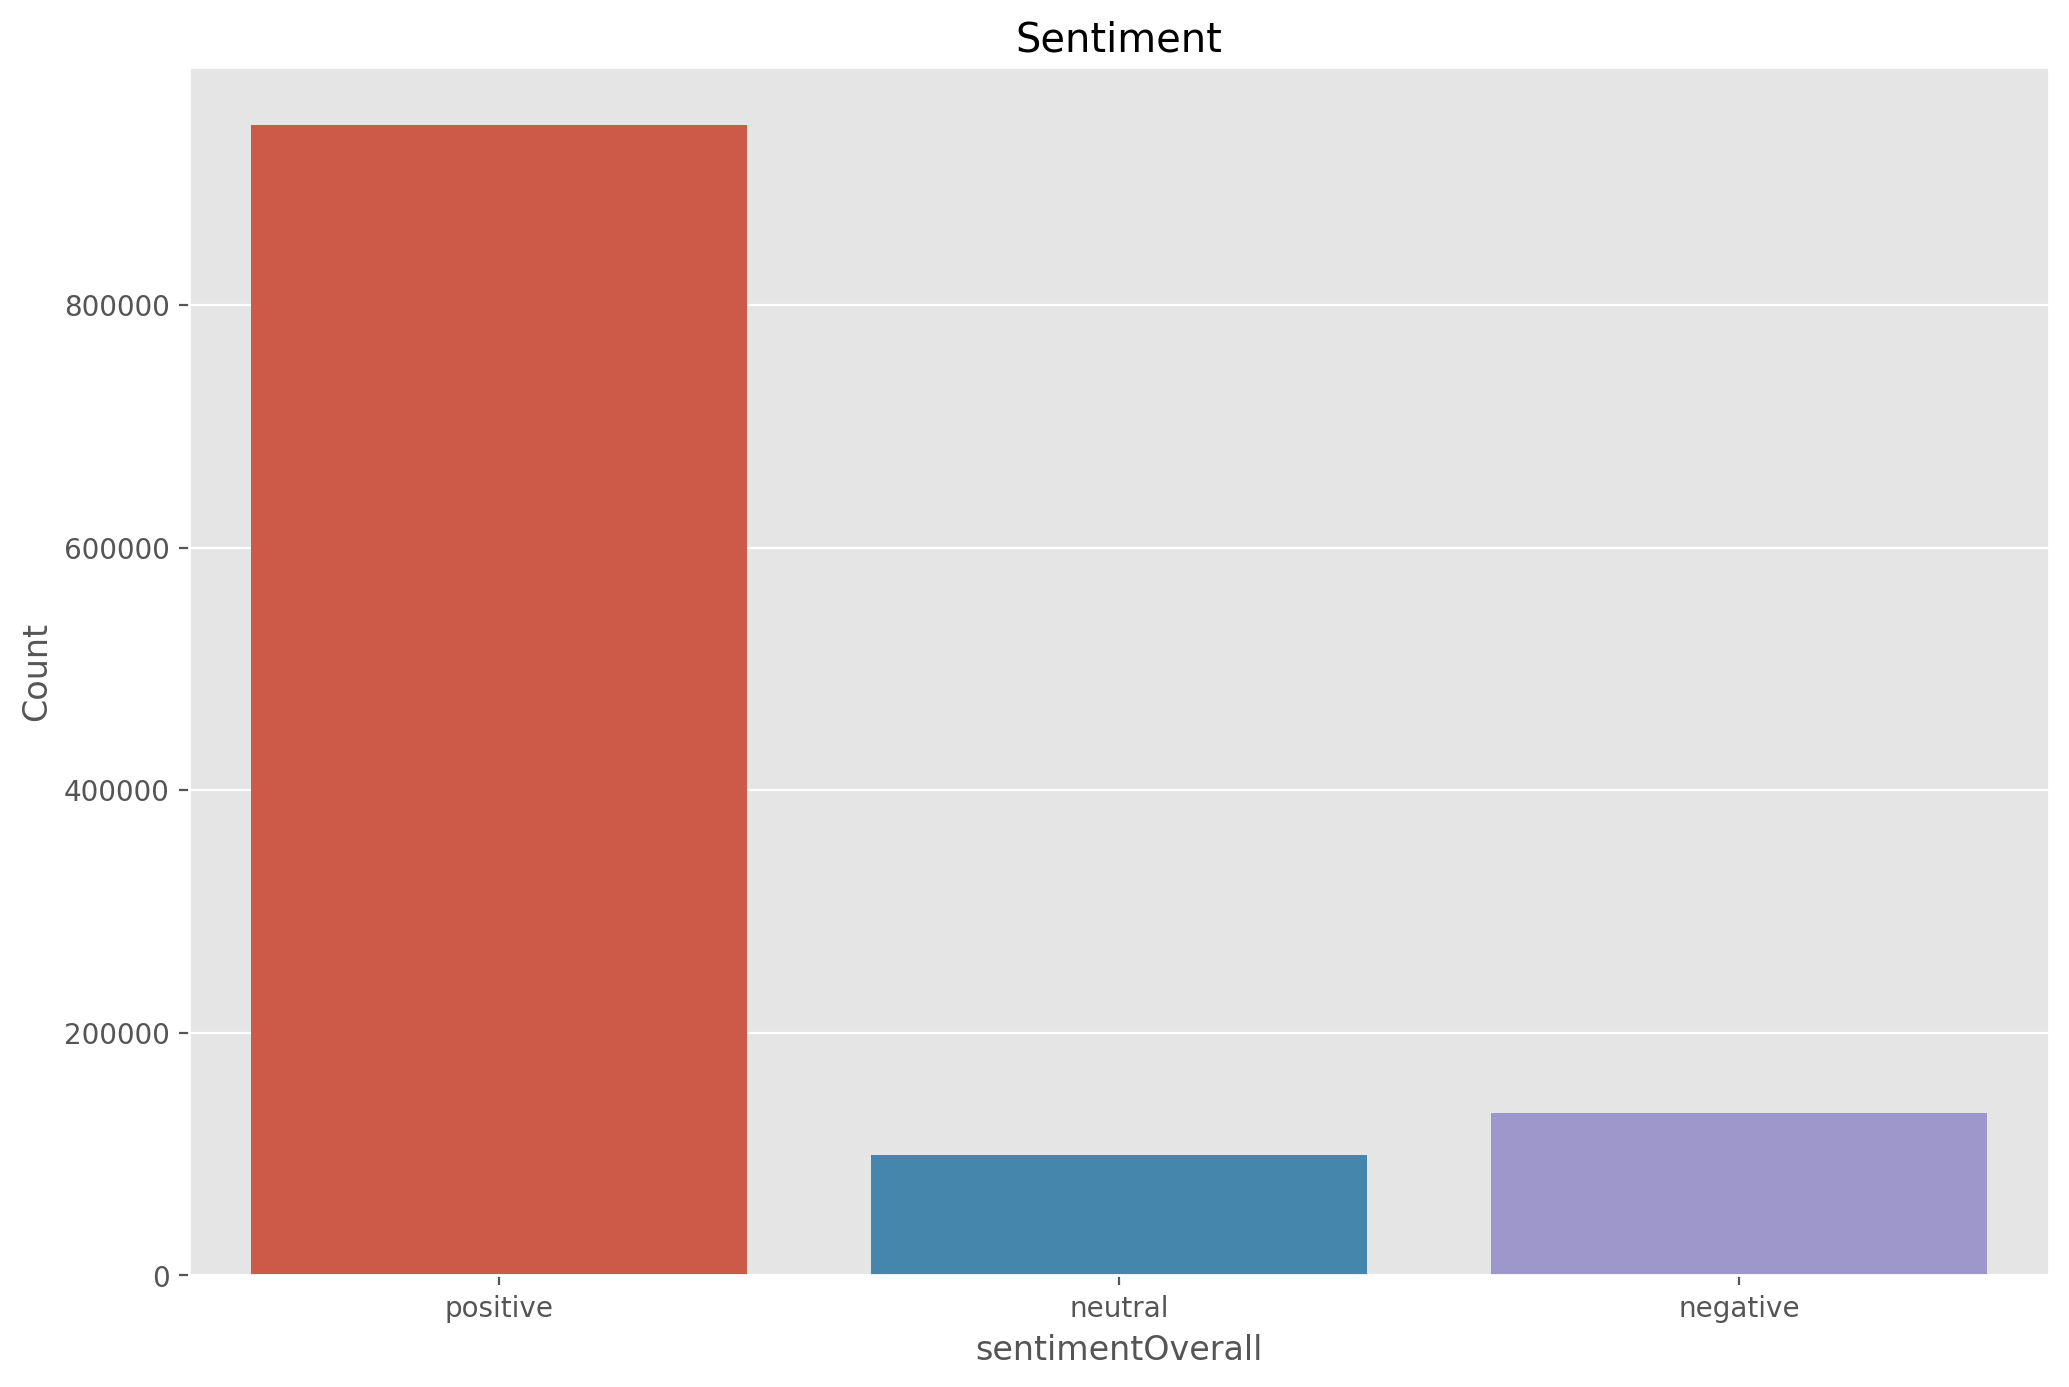

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,8), dpi=200)
ax = plt.subplot(111)
ax = sns.countplot(x='sentimentOverall', data=df)
ax.set_title('Sentiment')
ax.set_ylabel('Count'); 

**There is a lack of negative text examples, because of that our model is dominated by positive sententences**

In [49]:
df[["sentimentOverall","sentimentPolarity"]]

,sentimentOverall,sentimentPolarity
0,positive,positive
1,positive,negative
2,positive,positive
3,positive,positive
4,positive,positive
...,...,...
1181682,positive,positive
1181683,positive,positive
1181684,positive,positive
1181685,positive,negative


**In this section we can see that there is inconsistency between sentimentOverall and sentimentPolarity**

# Word Cloud

In [39]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [46]:
def create_wordcloud(text, mask):
    mask = np.array(Image.open(mask))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = 'white',
                   mask = mask,
                   max_words = 25000,
                   stopwords = stopwords)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Clous Saved Successfully')
    path='wc.png'
    display(Image.open(path))

negative = df[df['sentimentOverall']=='negative'].reviewText  # negative comments

positive = df[df['sentimentOverall']=='positive'].reviewText  # positive comments

Word Clous Saved Successfully


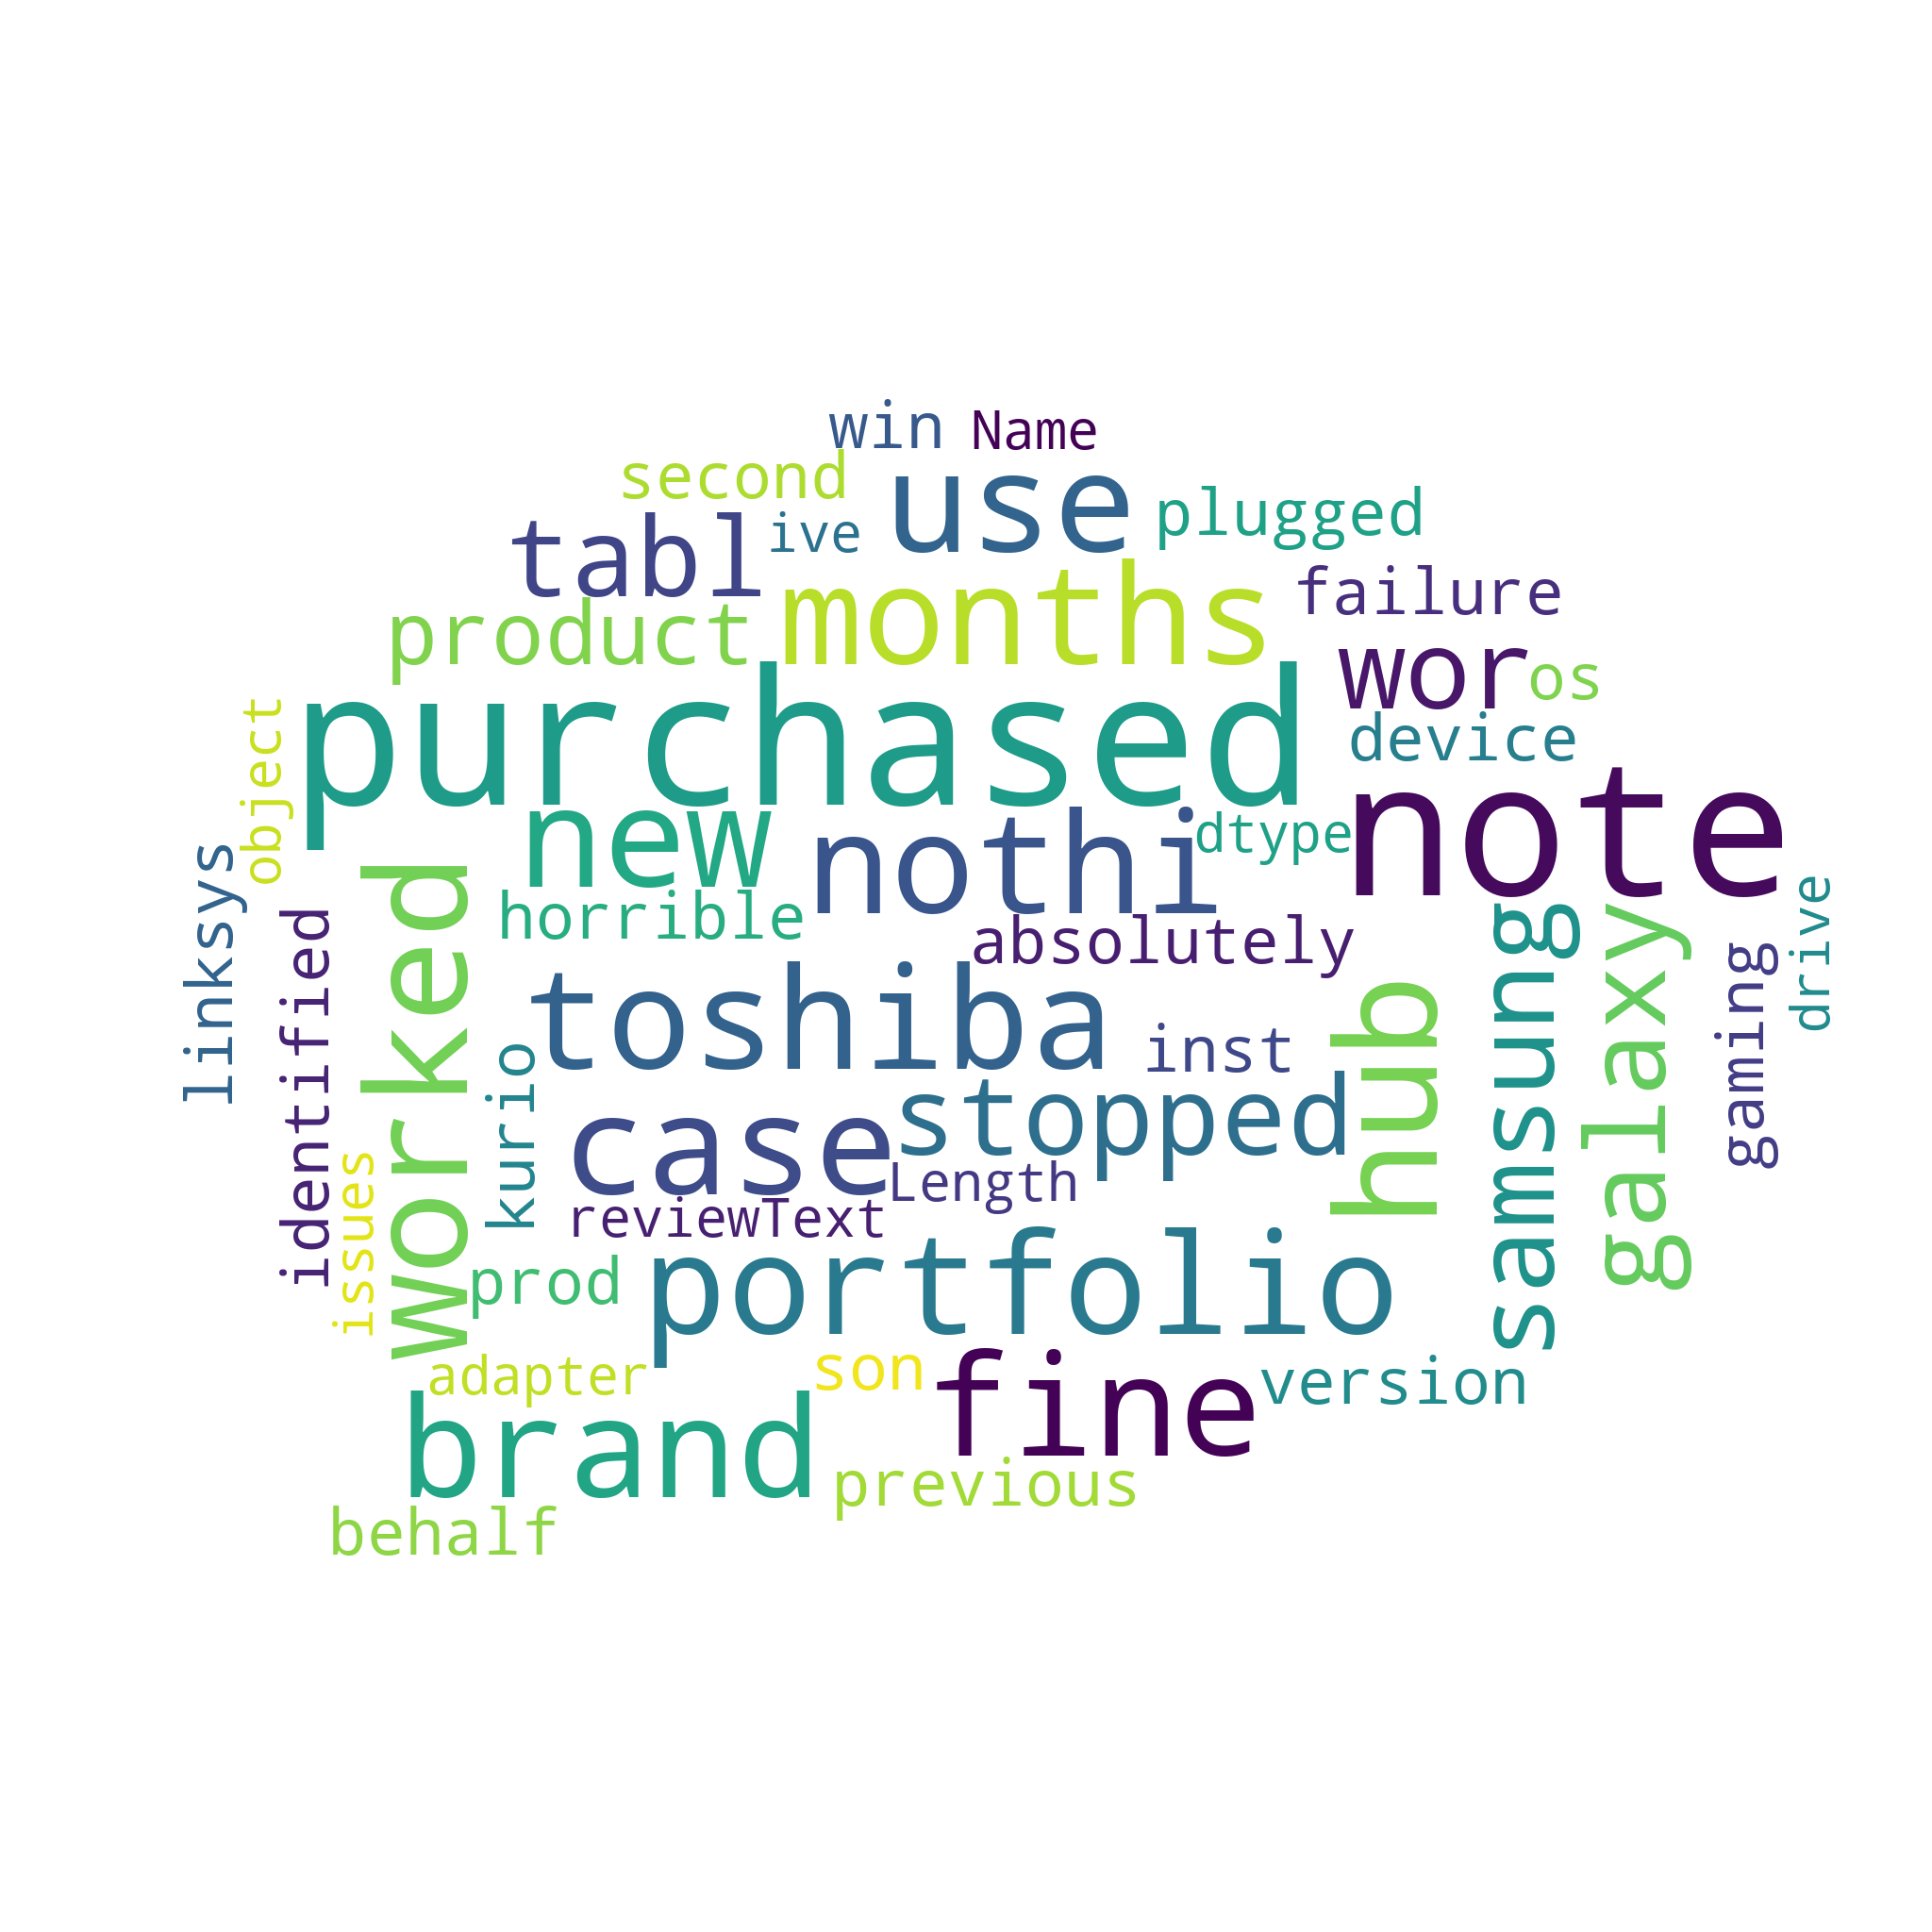

In [47]:
create_wordcloud(negative, 'comment.png')

Word Clous Saved Successfully


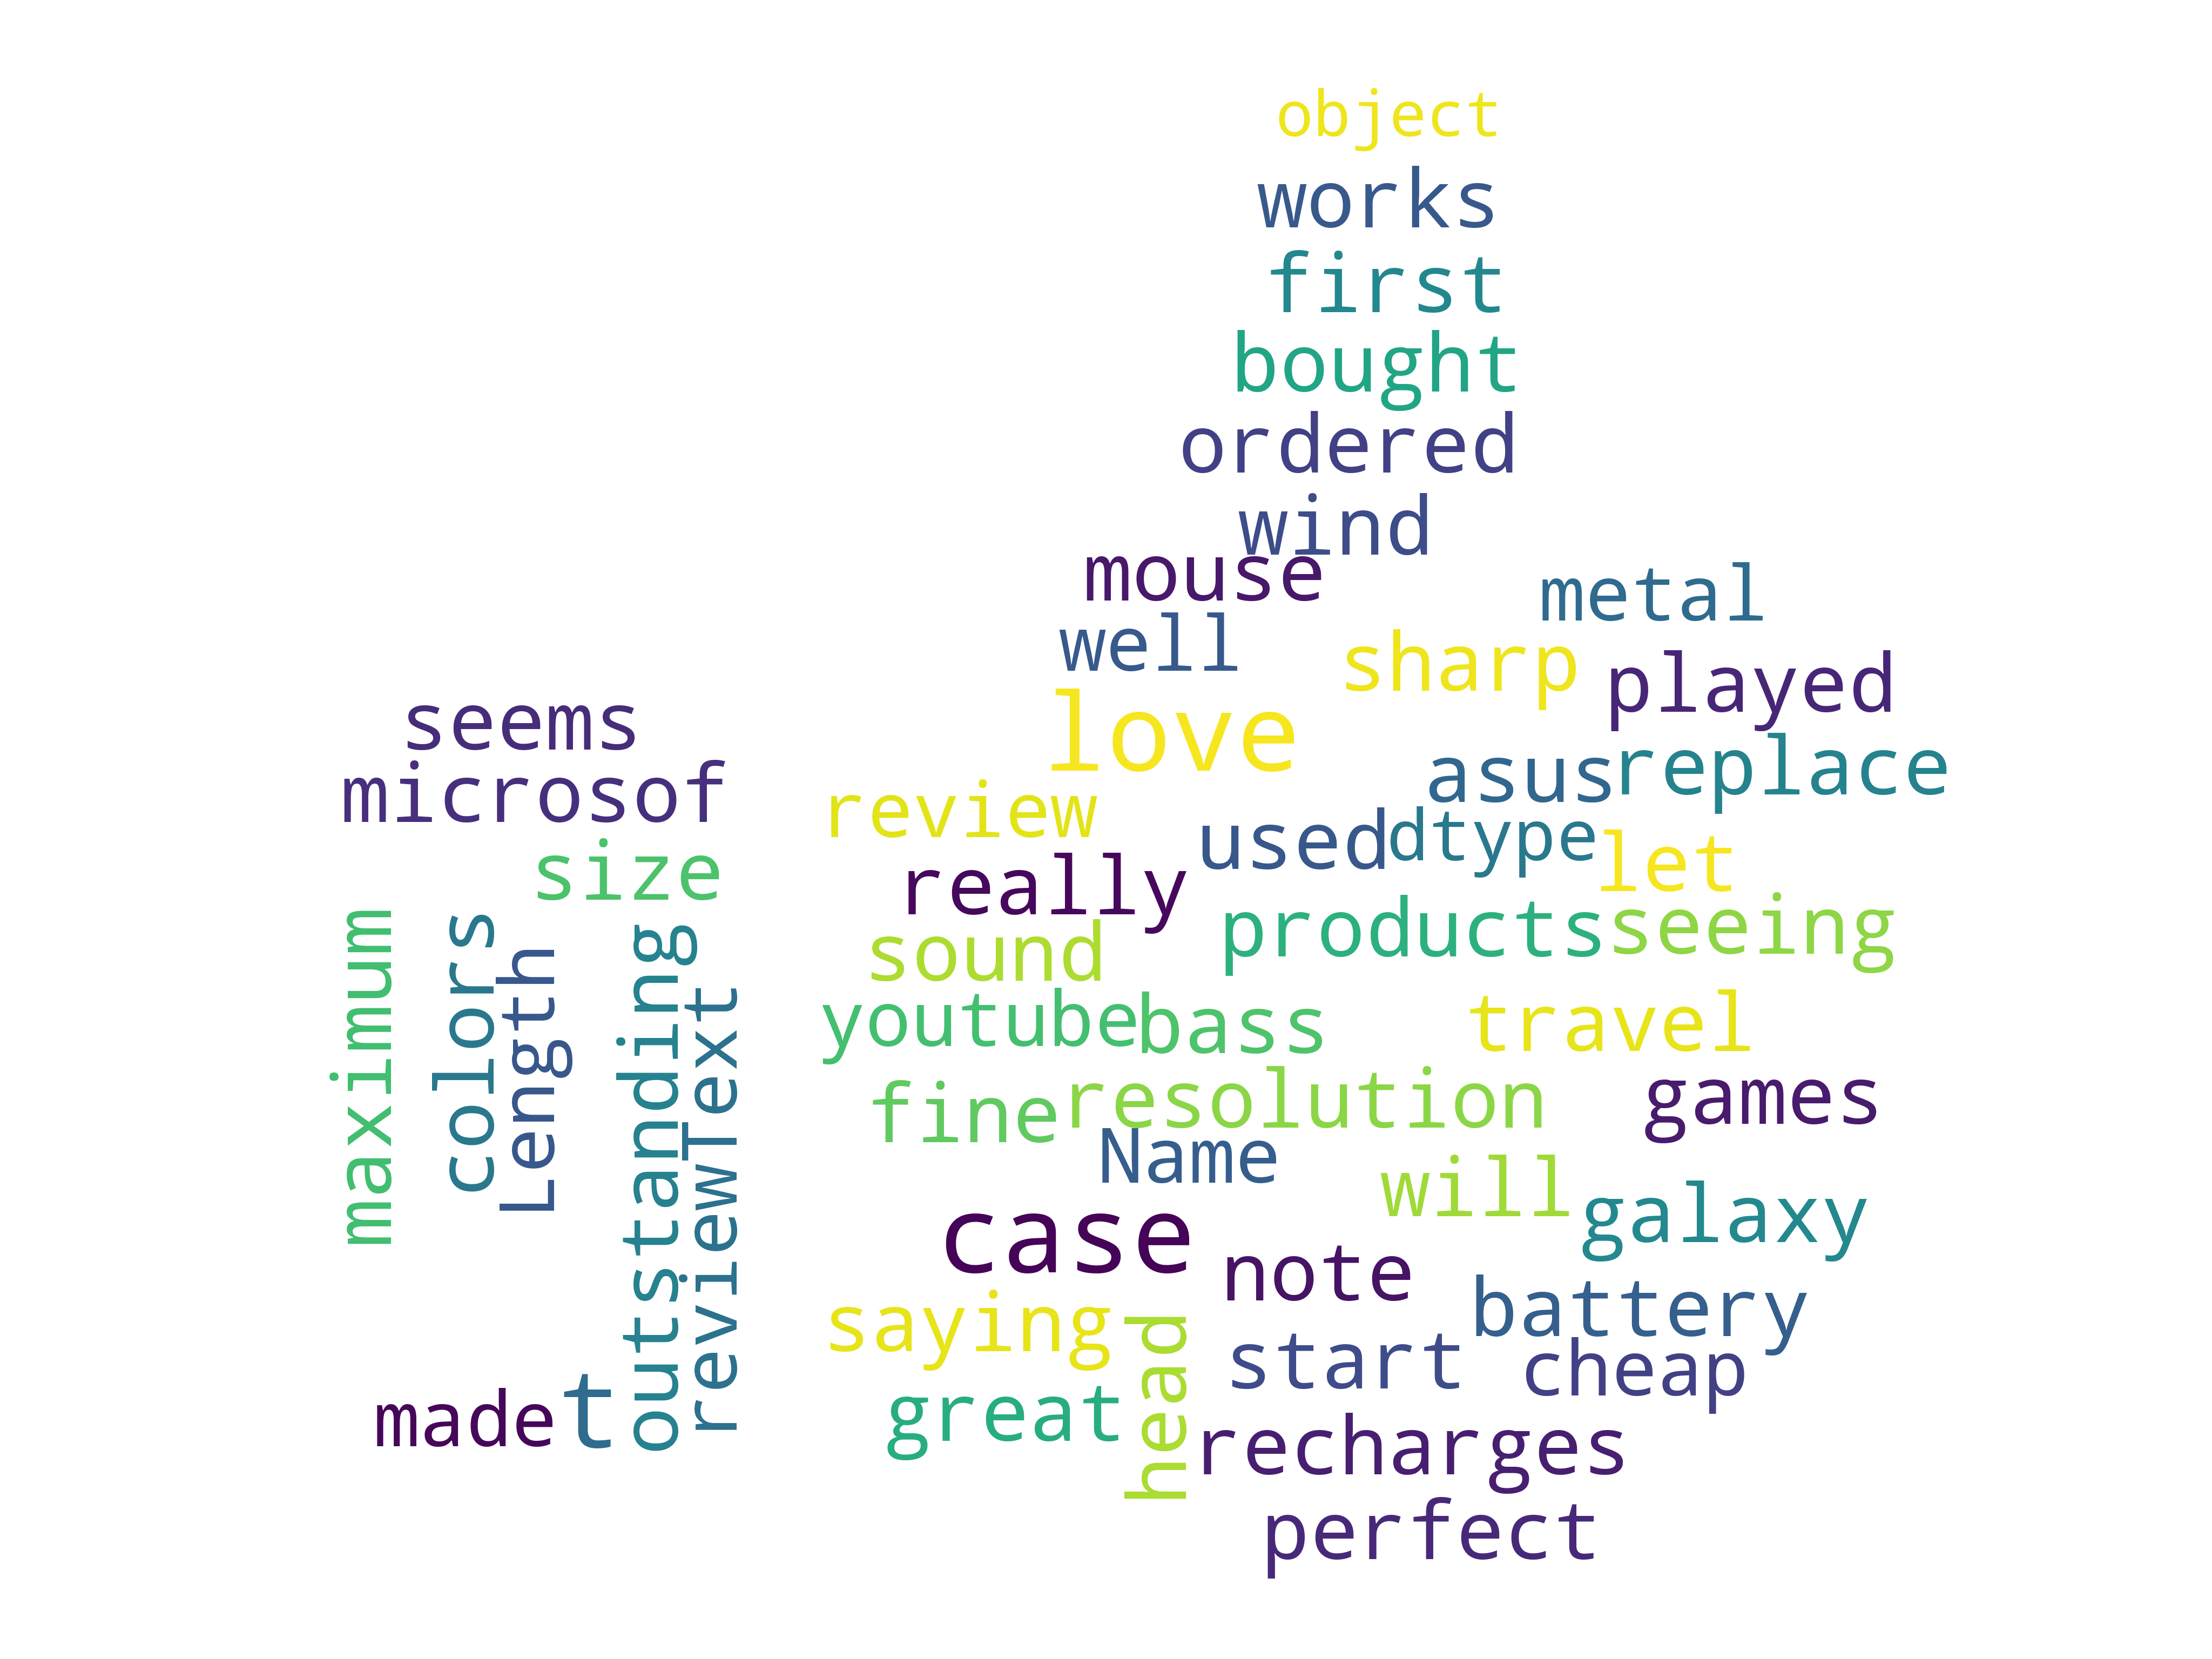

In [48]:
create_wordcloud(positive, 'upvote.png')

# Modelling

In [28]:
import pandas as pd

## Load the processed data

In [29]:
df = pd.read_csv('pause4.csv').drop('Unnamed: 0', axis=1)

In [31]:
df[df['sentimentOverall']=='negative']

,reviewText,overall,preprocessed,sentimentOverall,tokenized,polarity,subjectivity
10,it is a toshiba portfolio case but it is nothi...,2,"It is a Toshiba portfolio case, but it is noth...",negative,"['it', 'is', 'a', 'toshiba', 'portfolio', 'cas...",0.300000,0.450000
25,i purchased this hub for use with my brand new...,2,I purchased this hub for use with my brand new...,negative,"['i', 'purchased', 'this', 'hub', 'for', 'use'...",0.015878,0.472948
37,it worked fine for months then it stopped wor...,2,It worked fine for 11 months then it stopped w...,negative,"['it', 'worked', 'fine', 'for', 'months', 'the...",0.221667,0.598889
43,i have the samsung note and galaxy note tabl...,1,I have the Samsung Note 3 and Galaxy Note 8.0 ...,negative,"['i', 'have', 'the', 'samsung', 'note', 'and',...",0.075000,0.300000
50,this product is absolutely a failure of a prod...,1,This product is absolutely a failure of a prod...,negative,"['this', 'product', 'is', 'absolutely', 'a', '...",-0.038889,0.233333
...,...,...,...,...,...,...,...
1181652,plugged it in my win os identified it and inst...,1,"Plugged it in, my Win7 OS Identified it and in...",negative,"['plugged', 'it', 'in', 'my', 'win', 'os', 'id...",0.800000,0.400000
1181671,i purchased the kurio for my son on behalf of...,2,I purchased the Kurio 7 for my son on behalf o...,negative,"['i', 'purchased', 'the', 'kurio', 'for', 'my'...",0.035256,0.475402
1181672,horrible device i have the previous version a...,1,Horrible device. I have the previous 700 versi...,negative,"['horrible', 'device', 'i', 'have', 'the', 'pr...",-0.038462,0.453846
1181676,this is the second linksys gaming adapter ive ...,2,This is the second Linksys gaming adapter I've...,negative,"['this', 'is', 'the', 'second', 'linksys', 'ga...",-0.035862,0.301467


## Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english') 

def split_into_lemmas(text):
    
    text = str(text).lower() 
    
    words = TextBlob(text).words
    
    return [stemmer.stem(word) for word in words]

In [ ]:
x,y=df['reviewText'],df['sentimentOverall']

In [ ]:
df['reviewText']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80)

## Vectorizing 

In [ ]:
vect=CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2), analyzer=split_into_lemmas)
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [ ]:
accuracy_score(y_test,b_predict)

In [ ]:
vocab = vect.vocabulary_

In [ ]:
import pickle
pickle.dump(model, open('NLP.pkl', 'wb'))
pickle.dump(vocab, open('Vocab.pkl', 'wb'))

## Some examples of reviewtext 

**They are here for testing the model**

In [53]:
df['reviewText'][2], df['sentimentOverall'][2]

('really sharp colors i love asus products and this is no different plug and play picked it up and adjusted my resolution couldnt have been easier',
 'positive')

In [54]:
df['reviewText'][3], df['sentimentOverall'][3]

('games can be played at maximum resolution windows gave me a  max score on the graphics processing very good for its price u wont be dissappointed',
 'positive')

In [55]:
df['reviewText'][17], df['sentimentOverall'][17]

('image quality is top notch for a lens of this price provides excellent bokeh for portraits all the way up to fonly disadvantage is the af which is slow and does not lock in most of the timesbuild quality is cheaper than other canon lenses',
 'positive')

In [32]:
df['reviewText'][25], df['sentimentOverall'][25]

('i purchased this hub for use with my brand new imac a couple of months ago it seemed to work fine but i was having intermittent issues with the other usb ports on my computer the main problem was with my ipad mini retina which is connected by a lightning cable plugged directly into a port on the back of the imac everything would work properly for several days and then the ipad would constantly cycle between chargingnot connected with the ensuing beeps this would continue until the ipad was unplugged other times the ipad would stay connected but would only trickle charge once the problem started the only way to resolve the issue was to reboot the computer i tried switching usb ports and lightning cables to no availsince this is a powered hub and the problems were occurring on the other ports i didnt look to the hub as the cause of the problems big mistake  i thought my new imac was at faulta couple of days ago the issue came back and i was preparing to take my imac into apple to have 

# Load the Saved Data And Entegrate on Our Program

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
import pickle
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

def split_into_lemmas(text):
    #text = unicode(text, 'utf-8').lower() #Python 2
    text = str(text).lower() #Python 3
    words = TextBlob(text).words
    #return [word.lemmatize() for word in words]
    return [stemmer.stem(word) for word in words]

def clearing(text):
    
    text=text.lower() 
    text=text.replace("[^\w\s]","") 
    text=text.replace("\d+","") 
    text=text.replace("\n"," ").replace("\r","") 
    
    return text

def vectorizing(text):
    
    return vect.transform([text])


In [2]:
model = pickle.load(open('NLP.pkl','rb'))

vect=CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2), analyzer=split_into_lemmas)

vect.vocabulary_ = pickle.load(open('Vocab.pkl','rb'))

In [3]:
pred = model.predict(vectorizing(clearing('Hello')))

In [4]:
pred

array(['positive'], dtype='<U8')

# Using Model

# Making a Program for that project

In [40]:
import PySimpleGUI as sg
import time
from textblob import TextBlob

def clearing(text):
    
    text=text.lower() 
    text=text.replace("[^\w\s]","") 
    text=text.replace("\d+","") 
    text=text.replace("\n"," ").replace("\r","") 
    
    return text

def vectorizing(text):
    
    return vect.transform([text])

layout = [[sg.Text('Sentiment Analysis', font=("Helvetica", 25))],
          [sg.Image(filename=r'C:\Users\MONSTERHAN\Desktop\nltk.png', size=(75, 81))],
              [sg.Text('Please fill the area with text which you want to analyze')],
              [sg.In(justification='center', key='-IN-', enable_events=True, size=(60, 60))],
              [],
              [sg.Button('Analyze'), sg.Text(size=(25,1), key='-OUTPUT-')],
              [sg.Button('Exit')],
              [sg.Text('Created by Erhan Namlı', font=("Helvetica", 8))]]

window = sg.Window('', layout, element_justification='c')

while True:  # Event Loop
    
    event, values = window.read()
    
    if event == sg.WIN_CLOSED or event == 'Exit':
        
        break
        
    if event == 'Analyze':
        
        sonuc = model.predict(vectorizing(clearing(values['-IN-'])))
        
        window['-OUTPUT-'].update(sonuc)
    
    if event == 'Translate':
        
        ceviri = TextBlob(str(values['-IN-']))
        
        
        window['-OUTPUT2-'].update(ceviri.translate(to='en'))

![image](GUI.PNG)

**In this project our negative sentences are not correct interpreting via our model because there are few negative text data**